<a href="https://colab.research.google.com/github/yunatural/yunatural/blob/main/YUNA's_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
!pip install -U pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 35.0 MB/s 
     |████████████████████████████████| 690 kB 58.2 MB/s 
     |████████████████████████████████| 3.1 MB 18.6 MB/s 
     |████████████████████████████████| 596 kB 59.7 MB/s 
     |████████████████████████████████| 303 kB 64.3 MB/s 
     |████████████████████████████████| 11.1 MB 60.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 4.9 MB/s 
     |████████████████████████████████| 812 kB 68.5 MB/s 
     |████████████████████████████████| 38.1 MB 415 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=03e6e6d10593376b1979e3c0f00c9b5fb6cb0be1e32473bfe36f0101494e3221
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [94]:
import pandas as pd
import numpy as np
import pandas_profiling

In [95]:
%matplotlib inline

In [96]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['default.payment.next.month'],1)
vif = pd.DataFrame()
vif['Features']= data.columns
vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Features,vif
0,ID,3.900152
1,LIMIT_BAL,4.046427
2,SEX,9.247174
3,EDUCATION,6.798256
4,MARRIAGE,6.439144
5,AGE,11.216099
6,PAY_0,1.919145
7,PAY_2,3.212863
8,PAY_3,3.728466
9,PAY_4,4.445545


In [98]:
# AGE와 BILL_AMT(1~6)이 매우 높고, PAY함수들도 같이 줄여보고자 한다.

In [99]:
df['BILL_AMT_AVR']=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [100]:
df['CREDIT_PAY_AVR']=df[['PAY_0','PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

In [101]:
df_featured = df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [102]:
# BILL_AMT, PAY함수들은 하나로 합치고, AGE함수는 없앴습니다!

In [103]:
df_featured.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BILL_AMT_AVR', 'CREDIT_PAY_AVR'],
      dtype='object')

In [104]:
df=df_featured

In [105]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BILL_AMT_AVR', 'CREDIT_PAY_AVR'],
      dtype='object')

In [106]:
len(df.columns)

15

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['default.payment.next.month'],1)
vif = pd.DataFrame()
vif['Features']= data.columns
vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Features,vif
0,ID,3.865830
1,LIMIT_BAL,4.017144
2,SEX,9.225975
3,EDUCATION,6.765498
4,MARRIAGE,6.429126
5,AGE,11.188535
6,PAY_AMT1,1.333655
7,PAY_AMT2,1.247492
8,PAY_AMT3,1.276520
9,PAY_AMT4,1.233015


In [108]:
# AGE의 VIF가 10 이상으로 공산성이 높은 편이다. 공산성을 제거해줘야 한다.

In [109]:
age = 7
lab = [7,6,5,4,3,2,1]
df['AGE_IS_JUST_A_NUMBER'] = pd.cut(df['AGE'], bins= age,labels=lab)

In [110]:
df['AGE_IS_JUST_A_NUMBER'].describe()

count     30000
unique        7
top           7
freq       9618
Name: AGE_IS_JUST_A_NUMBER, dtype: int64

In [111]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_AMT_AVR,CREDIT_PAY_AVR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,44976.945200,-0.182439
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,63260.721860,0.982176
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-56043.166667,-2.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,4781.333333,-0.833333
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,21051.833333,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,57104.416667,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,877313.833333,6.000000


In [112]:
data1= df.drop(['default.payment.next.month', 'AGE', 'MARRIAGE', 'SEX'],1)
vif = pd.DataFrame()
vif['Features']= data1.columns
vif['vif']= [variance_inflation_factor(data1.values,i) for i in range(data1.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Features,vif
0,ID,3.803551
1,LIMIT_BAL,3.615017
2,EDUCATION,5.028375
3,PAY_AMT1,1.333509
4,PAY_AMT2,1.247461
5,PAY_AMT3,1.276324
6,PAY_AMT4,1.233055
7,PAY_AMT5,1.217511
8,PAY_AMT6,1.202777
9,BILL_AMT_AVR,2.187002


In [113]:
data1.columns

Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT_AVR', 'CREDIT_PAY_AVR',
       'AGE_IS_JUST_A_NUMBER'],
      dtype='object')

In [114]:
df.shape

(30000, 16)

In [115]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_AMT_AVR,CREDIT_PAY_AVR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,44976.945200,-0.182439
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,63260.721860,0.982176
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-56043.166667,-2.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,4781.333333,-0.833333
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,21051.833333,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,57104.416667,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,877313.833333,6.000000


In [116]:
features_names = df.columns

In [117]:
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 15)
(30000,)


In [118]:
# @@@@@@@@@@

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

In [120]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [121]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [122]:
y_predict = rf.predict(X_test)

In [125]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.2144492413356642, 'BILL_AMT_AVR'),
 (0.09582650087009162, 'default.payment.next.month'),
 (0.08216553179817858, 'ID'),
 (0.07748083613859108, 'PAY_AMT1'),
 (0.07632767429864212, 'PAY_AMT2'),
 (0.07439424252455382, 'LIMIT_BAL'),
 (0.06793839826043306, 'PAY_AMT3'),
 (0.06316235603873188, 'PAY_AMT4'),
 (0.061436193072926616, 'PAY_AMT6'),
 (0.060561068191970456, 'PAY_AMT5'),
 (0.059095981259185304, 'AGE'),
 (0.021346097811893658, 'CREDIT_PAY_AVR'),
 (0.021196149962823665, 'EDUCATION'),
 (0.013300934394651173, 'MARRIAGE'),
 (0.011318794041662838, 'SEX')]

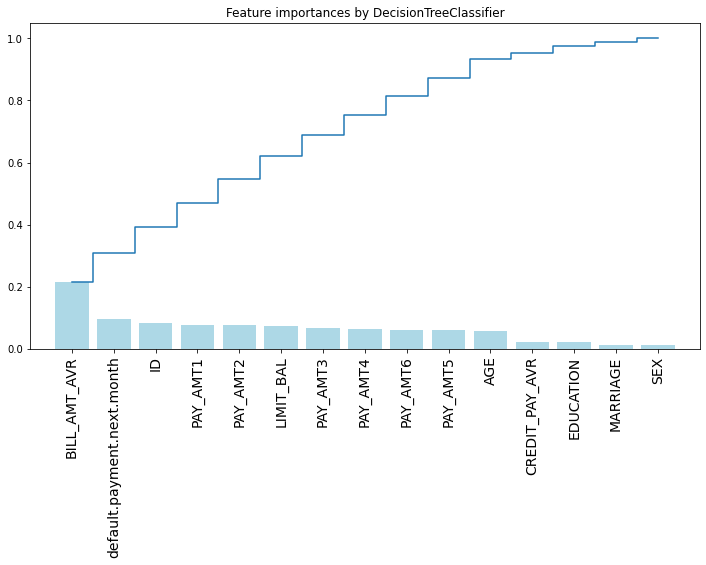

In [124]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [126]:
# *****

In [127]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [128]:
X_test.shape

(9000, 15)

In [129]:
y_prediction = rf.predict(X_test)

In [130]:
y_probability = rf.predict_proba(X_test)

In [131]:
y_probability.shape

(9000, 2)

In [132]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.29846938775510207


In [133]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [134]:
print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.95      0.88      7040
     default       0.61      0.30      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000



In [135]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [136]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6660  380]
 [1375  585]]


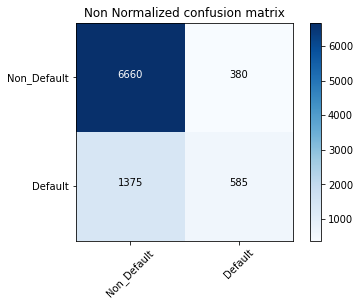

In [137]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')